# Research of computer games

We have data (until 2016) on game sales, user and expert ratings, genres and platforms (eg Xbox or PlayStation).

We should identify patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('/datasets/games.csv') 
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Description of variables**
* Name - the name of the game
* Platform - platform
* Year_of_Release - year of release
* Genre - game genre
* NA_sales - sales in North America (millions of copies sold)
* EU_sales - sales in Europe (millions of copies sold)
* JP_sales - sales in Japan (millions of copies sold)
* Other_sales - sales in other countries (millions of copies sold)
* Critic_Score - Critics score (max 100)
* User_Score - user score (maximum 10)
* Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Let's estimate the size of the table, the types of variables, and also check for possible gaps:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

Name               16713 non-null object

Platform           16715 non-null object

Year_of_Release    16446 non-null float64

Genre              16713 non-null object

NA_sales           16715 non-null float64

EU_sales           16715 non-null float64

JP_sales           16715 non-null float64

Other_sales        16715 non-null float64

Critic_Score       8137 non-null float64

User_Score         10014 non-null object

Rating             9949 non-null object

dtypes: float64(6), object(5)

memory usage: 1.4+ MB


* Total 16715 input data;
* Some data has incorrect variable type (for example, `user_score`)

In [5]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.01
Platform,0
Year_of_Release,1.61
Genre,0.01
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.32
User_Score,40.09


* Variables `critic_score`, `user_score` and `rating` contain more than 40% missing values, which we cannot ignore.

<a id="step1"></a>
**Conclusion**

Each line of the table contains detailed information about the sales of computer games, about their ratings by users and experts, about the genres and platforms of these games.

First, we have to prepare the data for analysis: process the identified missing values, change the data type, and also convert the variable names to lower case.

Then, let's move on to the actual analysis.

### Preparing data for analysis

Before starting data processing, let's convert the variable names to lowercase:

In [6]:
df.columns = df.columns.str.lower()

#### Handling Missing Values and Incorrect Types

In [7]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Заменим `na` на 0:

In [8]:
df['critic_score'] = df['critic_score'].fillna(0)

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The `tbd` parameter - *no ratings yet* - no ratings displayed because at least four (4) reviews are missing from the platform database.

https://www.metacritic.com/faq

Since the `user_score` variable is needed later for calculations, only a numeric replacement will do.

It was possible to substitute the data `critic_score`, but they are measured on a 100-point scale.
Let's try to replace `na` with 0 and `tbd` with -1, and also change the type from `object` to `float`.

*Before replacing `na` with 0, check how many games with `user_score` = 0 are in our database*:

In [10]:
df.loc[df['user_score'] == '0'] # 1 game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,0.0,0,E


In [11]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1

In [12]:
df['user_score'] = df['user_score'].fillna(0).astype(float)

The `rating` category also has 40% missing values:

In [13]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Decryption:

* Rating Pending (RP) - "Rating pending"
* "EC" ("Early childhood") - "For young children"
* "E" ("Everyone") - "For everyone" **OR** "K-A" ("Kids to Adults")
* "E10+" ("Everyone 10 and older")
* "T" ("Teen") - "Teens" (13+)
* "M" ("Mature") - "For adults" (17+)
* "AO" ("Adults Only 18+") - "Adults Only"
* "RP" ("Rating Pending") - "Rating is pending"

https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Let's edit the values a bit:

In [14]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

In [15]:
df['rating'] = df['rating'].fillna('Unknown')

Year of release - `year_of_release` is not of the correct type, but ~1% of gaps prevent it from being changed:

Since there are very few missing values, we will remove them with the `dropna()` method and change the type from `float64` to `int`:

In [16]:
df.dropna(subset = ['year_of_release'], inplace = True)
df['year_of_release'] = df['year_of_release'].astype(int)

Although `name` and `genre` also have very few spaces, let's replace them with `Unknown`:

In [17]:
df['name'] = df['name'].fillna('Unknown')

In [18]:
df['genre'] = df['genre'].fillna('Unknown')

In [19]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


#### Checking for duplicates

In [20]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'Unknown'], dtype=object)

In [22]:
df.duplicated().sum()

0

#### New variable

Let's add a new variable `total_sales` with total sales in all regions:

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38


<a id="step2"></a>
**Conclusion**

Several key variables for further analysis - `user_score`, `critic_score` and `rating` contained more than 40% of missing values, which we replaced with `0` and `Unknown` respectively. Moreover, we have replaced the `tbd` category in the rating with -1. In the `year_of_release` category, we removed less than 2% of missing values.

We also changed the type of two variables - `user_score` and `year_of_release` to `float` and `int` respectively to implement future calculations.

### Data analysis

####  Selection of actual data

At this stage, we need to select key values ​​to describe the current forecast for 2017.

1. Let's see how many games were released in different years in general:

In [25]:
numb_games = df.pivot_table(index='year_of_release', values =[ 'name'],
                               aggfunc={'name': 'count'})
numb_games.columns = ['numb_of_games']
numb_games

,numb_of_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


> * In the period from 2006 to 2011 there is a boom: a lot of computer games are released, which leads to an increase in sales.
> * Since 2012, we have seen a sharp decline that will continue until 2014 inclusive.

**Do data for all periods matter?**

* The table above shows that it makes no sense to consider the 20th century, since the culture of games was only gaining momentum. Moreover, for an up-to-date forecast, it is probably not worth considering games released more than 16 years ago.
* Let's try to filter the data since 2005, capturing the peak and decline of computer games.

In [26]:
df_new = df[(df['year_of_release'] > 2004)]

2. По отфильтрованному периоду посмотрим на то, как распределились данные по *количеству проданных копий по всем регионам*:

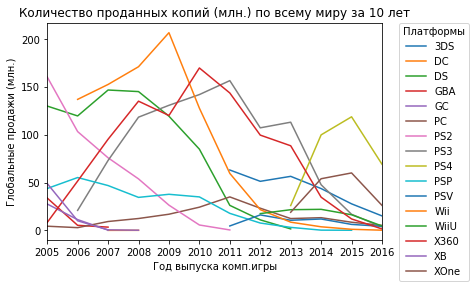

In [27]:
total_sales_by_platforms = pd.pivot_table(df_new, values='total_sales', index='year_of_release', columns='platform',
                    aggfunc=np.sum)
ax = total_sales_by_platforms.plot(xticks=total_sales_by_platforms.index)
ylab = ax.set_ylabel('total_sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Количество проданных копий (млн.) по всему миру за 10 лет")
ax.set_ylabel("Глобальные продажи (млн.)")
ax.set_xlabel("Год выпуска комп.игры")
plt.legend(title = 'Платформы', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

> * The graph shows that by 2013, as many as 5 platforms cease to release games: DS, PS2, GBA, XB and GC
> * However, in the same 2013, 2 new platforms appear, subsequently leading in terms of the number of copies sold - XOne and PS4.
> * You can also highlight the top 5 platforms that by 2016 are leaders in the number of copies sold: PS4, XOne, 3DS, PS3 and WiiU

3. Let's also check the median number of years for which games are released on a particular platform *for all time*, and then filter out the platforms that *released games in 2016*:

In [28]:
df_group_max = df.groupby('platform')['year_of_release'].max() 
df_group_min = df.groupby('platform')['year_of_release'].min() 
data_group_total = pd.DataFrame([df_group_max, df_group_min]).T
data_group_total['life_period'] = df_group_max - df_group_min
data_group_total.set_axis(['max_year', 'min_year', 'life_period'], axis='columns', inplace=True)
data_group_total.sort_values('max_year', ascending = False)

,max_year,min_year,life_period
platform,,,
XOne,2016,2013,3
3DS,2016,2011,5
X360,2016,2005,11
WiiU,2016,2012,4
Wii,2016,2006,10
PSV,2016,2011,5
PC,2016,1985,31
PS4,2016,2013,3
PS3,2016,2006,10


In [29]:
print('Медианный срок жизни платформ, выпускающих игры за всё время:', data_group_total['life_period'].median())

Медианный срок жизни платформ, выпускающих игры за всё время: 6.0


Let's look at platforms with games released in 2016:

In [30]:
data_group_total_2016 = data_group_total.query('max_year == 2016')
print('Медианный срок жизни платформ, выпускающих игры в 2016 году:', data_group_total_2016['life_period'].median())

Медианный срок жизни платформ, выпускающих игры в 2016 году: 5.0


> * Based on the median, it is necessary to start counting from 2012. However, based on the graph above, by 2012, one of the platforms will stop releasing games, and activity of many platforms will begin to decline.
> * Based on all the above factors, for the **actual period** we take the data **from 2013 to 2016**.

In [31]:
df_actual = df_new[(df_new['year_of_release'] > 2012)]
df_actual['year_of_release'].unique()

array([2013, 2015, 2014, 2016])

####  Selection of profitable platforms

Previously, we have already mentioned the top 5 platforms in terms of the number of copies sold worldwide. Let's look at the dynamics of sales again, discarding irrelevant data:

Text(0.5, 1.0, 'Количество проданных \n копий (%) на платформе')

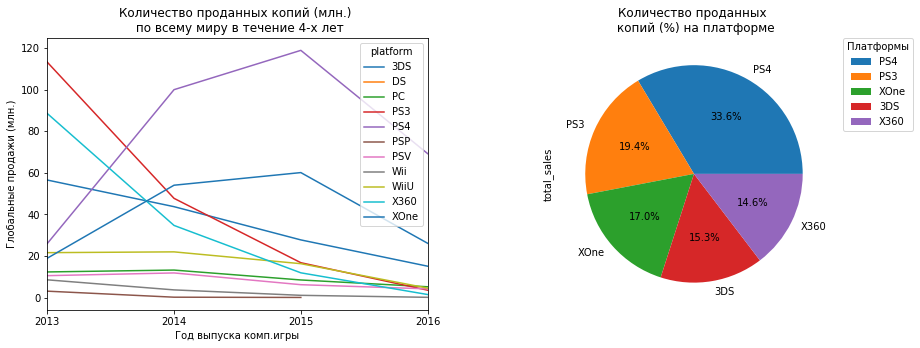

In [32]:
df1 = pd.pivot_table(df_actual, values='total_sales', index='year_of_release', columns='platform',
                    aggfunc=np.sum)
df2 = pd.pivot_table(df_actual, values='total_sales', index='platform',
                   aggfunc=np.sum)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

df1.plot(xticks=df1.index, ax=axes[0])
axes[0].set_title("Количество проданных копий (млн.) \n по всему миру в течение 4-х лет")
axes[0].set_ylabel("Глобальные продажи (млн.)")
axes[0].set_xlabel("Год выпуска комп.игры")

ax2 = df2.sort_values('total_sales', ascending=False).head(5).plot.pie(autopct="%.1f%%", subplots=True, ax=axes[1])
plt.legend(title = 'Платформы', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Количество проданных \n копий (%) на платформе')

> * The PS4 platform as a whole occupies the largest share of all games sold (33%), XOne - 17%. In addition, the graph above shows that these two platforms, unlike the others, significantly increased the number of games sold (million) by 2015.
> * What can not be said about the platforms 3DS, PS3 and X360 - their performance in 2015 is rapidly falling. The situation with PS3 is quite logical - since it is an outdated version of PS4
> * There are platforms that are not in the top 5 in sales worldwide, but their performance is stable over time - WiiU and PC (personal computer). The result on PC is also explainable: a platform that is not subject to updates, and also has a large number of people.
> * *Thus, potentially profitable platforms are: PS4, 3DS, WiiU, XOne, PC*

In [33]:
df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


#### Analysis of popular platforms

In [34]:
top_5_platforms = df_actual.loc[df_actual['platform'].isin(['PS4', '3DS', 'XOne', 'WiiU', 'PC'])]

In [35]:
((len(top_5_platforms.loc[top_5_platforms['user_score'] == -1]))*100) / len(top_5_platforms)

4.173354735152488

In [36]:
top_5_platforms_no_tbd = top_5_platforms.loc[top_5_platforms['user_score'] != -1]

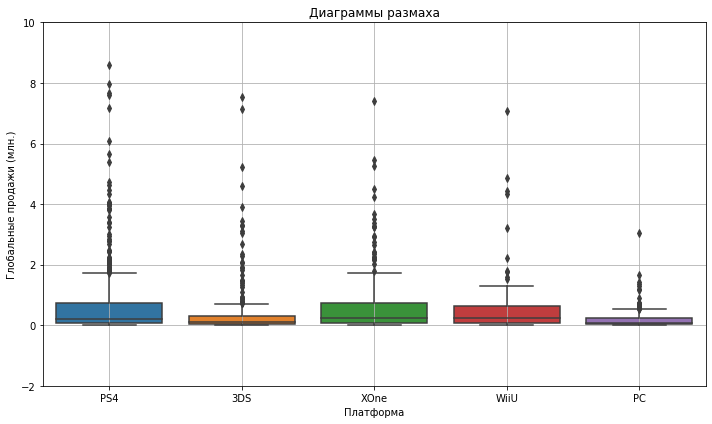

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="platform", y="total_sales", data=top_5_platforms_no_tbd)
plt.ylim([-2,10])
plt.title('Диаграммы размаха')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн.)')
plt.grid()
plt.tight_layout()

> * Selected platforms have many sales outliers of different frequency. However, almost all platforms (except PC) have rare values beyond the mark of 6 million copies sold.

**1. Do reviews from users and critics affect sales within one popular platform - PS4?****

* H0: no relationship between reviews and sales
* H1: there is a connection

In [38]:
top_platform_PS4 = top_5_platforms_no_tbd.loc[top_5_platforms_no_tbd['platform'] == 'PS4']

Text(0.5, 0.98, 'Диаграммы размаха: PS4')

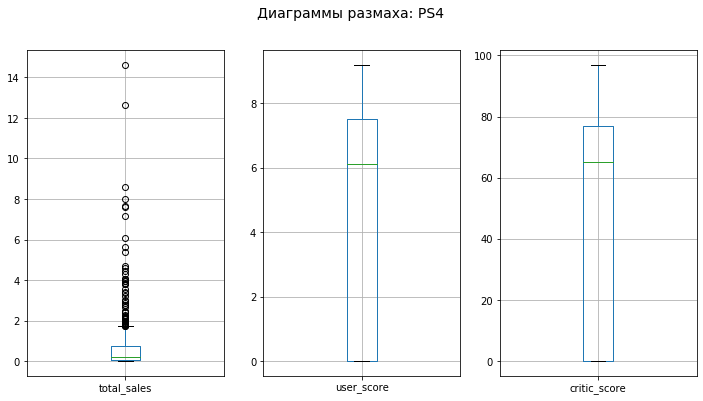

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
top_platform_PS4[['total_sales']].boxplot(ax=axes[0])
top_platform_PS4[['user_score']].boxplot(ax=axes[1])
top_platform_PS4[['critic_score']].boxplot(ax=axes[2])
fig.suptitle('Диаграммы размаха: PS4', fontsize=14)

1. `total_sales` contains rare outliers;
2. The distribution of `user_score` and `critic_score` is strongly biased towards 0, because most of the categories here are `na` replaced by 0
 
Let's filter out these 0's and get rid of outliers:

In [40]:
top_platform_PS4 = top_platform_PS4[top_platform_PS4['total_sales'] < 5]

In [41]:
top_platform_PS4_no_0 = top_platform_PS4[top_platform_PS4['critic_score'] > 0]
top_platform_PS4_no_0 = top_platform_PS4_no_0[top_platform_PS4_no_0['user_score'] > 0]

In [42]:
top_platform_PS4_no_0[['total_sales', 'critic_score', 'user_score']].describe()

,total_sales,critic_score,user_score
count,241.000000,241.000000,241.000000
mean,0.761535,71.684647,6.768465
std,1.067316,12.458269,1.457681
min,0.010000,19.000000,1.500000
25%,0.070000,66.000000,6.200000
50%,0.260000,73.000000,7.100000
75%,0.930000,80.000000,7.800000
max,4.620000,93.000000,9.200000


* The standard deviation of user and critic ratings is small - the values in the set are grouped around the average (6.7 and 71.6, respectively).
* There is a shift to the right of zero in the sales data - these are the most popular games.

Let's look at the scatterplots:

Text(0.5, 0.98, 'Диаграммы рассеяния: PS4')

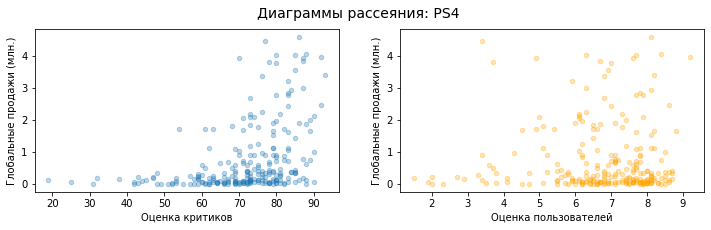

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
top_platform_PS4_no_0.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, ax=axes[0]) 
top_platform_PS4_no_0.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, ax=axes[1], color='orange')
axes[0].set_xlabel("Оценка критиков")
axes[0].set_ylabel("Глобальные продажи (млн.)")
axes[1].set_xlabel("Оценка пользователей")
axes[1].set_ylabel("Глобальные продажи (млн.)")
fig.suptitle('Диаграммы рассеяния: PS4', fontsize=14)

Judging by the charts, critics' scores are associated with sales growth. However, let's also look at the correlation coefficient by applying the non-parametric Spearman test.

This criterion is more resistant to uneven distribution.

Let's check the correlations on the test sample:

In [43]:
from scipy.stats import spearmanr

In [44]:
spearmanr(top_platform_PS4_no_0['critic_score'], top_platform_PS4_no_0['total_sales']) 

SpearmanrResult(correlation=0.4755006264705899, pvalue=5.33277620236531e-15)

In [45]:
spearmanr(top_platform_PS4_no_0['user_score'], top_platform_PS4_no_0['total_sales']) 

SpearmanrResult(correlation=-0.004829377346965932, pvalue=0.9405467062111337)

> * According to the Spearman coefficient, there is a positive relationship between critics' scores `critic_score` and sales volume `total_sales` - it was not possible to accept the hypothesis H0;
> * However, there is no connection between the ratings of ordinary users `user_score` and the volume of sales `total_sales` - we accept the hypothesis H0.

**2. Do reviews from users and critics affect sales within other popular platforms?**

Let's carry out a similar analysis for other platforms:

* H0: no relationship between reviews and sales
* H1: there is a connection

In [46]:
other_platforms = top_5_platforms_no_tbd.loc[top_5_platforms_no_tbd['platform'] != 'PS4']

Text(0.5, 0.98, 'Диаграммы размаха: 3DS, XOne, WiiU, PC')

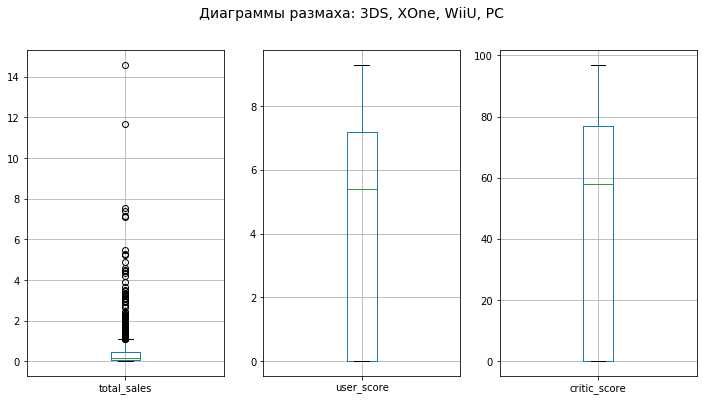

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

other_platforms[['total_sales']].boxplot(ax=axes[0])
other_platforms[['user_score']].boxplot(ax=axes[1])
other_platforms[['critic_score']].boxplot(ax=axes[2])
fig.suptitle('Диаграммы размаха: 3DS, XOne, WiiU, PC', fontsize=14)

In [48]:
other_platforms = other_platforms[other_platforms['total_sales'] < 6]

In [49]:
other_platforms_no_0 = other_platforms[other_platforms['critic_score'] > 0]
other_platforms_no_0 = other_platforms_no_0[other_platforms_no_0['user_score'] > 0]

In [50]:
other_platforms_no_0[['total_sales', 'critic_score', 'user_score']].describe()

,total_sales,critic_score,user_score
count,448.000000,448.000000,448.000000
mean,0.556339,73.258929,6.656696
std,0.858867,12.468122,1.504118
min,0.010000,20.000000,1.400000
25%,0.067500,67.000000,5.800000
50%,0.230000,75.000000,6.900000
75%,0.630000,82.000000,7.800000
max,5.470000,97.000000,9.300000


Similar to the most popular platform, here we see a small spread in ratings from critics and users, and a shift to the right from zero within sales.

Let's create scatterplots and conduct a non-parametric test:

Text(0.5, 0.98, 'Диаграммы рассеяния: 3DS, XOne, WiiU, PC')

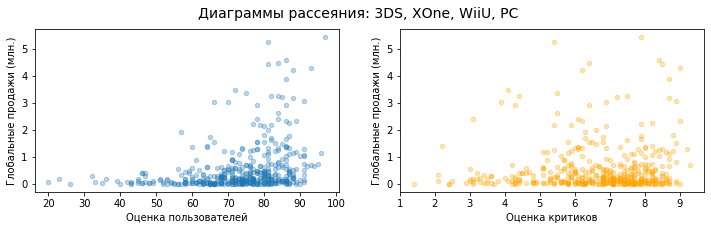

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
other_platforms_no_0.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, ax=axes[0]) 
other_platforms_no_0.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, ax=axes[1], color='orange')
axes[0].set_xlabel("Оценка пользователей")
axes[0].set_ylabel("Глобальные продажи (млн.)")
axes[1].set_xlabel("Оценка критиков")
axes[1].set_ylabel("Глобальные продажи (млн.)")
fig.suptitle('Диаграммы рассеяния: 3DS, XOne, WiiU, PC', fontsize=14)

In [52]:
spearmanr(other_platforms_no_0['critic_score'], other_platforms_no_0['total_sales']) 

SpearmanrResult(correlation=0.3599219586045258, pvalue=3.78526106531584e-15)

In [53]:
spearmanr(other_platforms_no_0['user_score'], other_platforms_no_0['total_sales']) 

SpearmanrResult(correlation=0.043655125841282956, pvalue=0.3566000734628997)

> * Critics' scores are also weakly and positively correlated with sales volumes across the following platforms: 3DS, XOne, WiiU, PC. In the case of user ratings, there is no connection. However, we do not have enough reason to accept H0 about the lack of relationship between ratings (in this case by critics) and sales. Also, there are fewer critics and they rarely give low marks.


**3. Are there any differences between genres among popular platforms?**

In [54]:
top_5_platforms_genre = pd.pivot_table(top_5_platforms, values=['name', 'total_sales'], 
                                index=['genre'], aggfunc={'name': 'count',
                             'total_sales': 'median'})
top_5_platforms_genre.sort_values('total_sales', ascending=False)

,name,total_sales
genre,,
Shooter,120,0.495
Sports,110,0.275
Platform,49,0.260
Role-Playing,150,0.190
Fighting,38,0.155
Misc,93,0.120
Racing,57,0.120
Action,443,0.110
Simulation,47,0.100


> * Top selling genres: Shooter, Sports and Platform;
> * Most NOT popular: Puzzle, Strategy and Adventure;
> * Our sample contains the most games of the genres: Action (443 games) and Role-Playing (150 games) - however, they are not in the top 3 in terms of sales.
> * *Thus, the top selling games may not be the most popular genres on the market*.

<a id="step3"></a>
**Conclusion**

At this stage, we selected the actual period - from 2013 to 2016, based on the graph data, as well as on the median lifetime of the platforms.

Then we selected the top 5 platforms based on several factors: 1) by the number of copies sold for the entire current period; 2) according to the dynamics of growth/decline of sold copies for the current period. As a result, the following platforms were selected: 'PS4', '3DS', 'XOne', 'WiiU', 'PC'.

For the selected data, we conducted a correlation analysis, comparing the results with the leading platform in sales - PS4. As a result, sales of PS4 platform games, according to the Spearman test, are weakly and positively affected by critics' scores. However, user rating, on the contrary, does not affect.
For the rest of the platforms, a strong relationship was found between critical ratings and sales. In the case of user ratings, there is no connection.

Finally, we compared the genres among the selected top 5 platforms. As a result, we found that the genres with the highest sales volumes are not necessarily those of the largest number of released games.

###  User portrait of each region

#### Most popular platforms (top 5):

Text(0.5, 1.0, 'Япония')

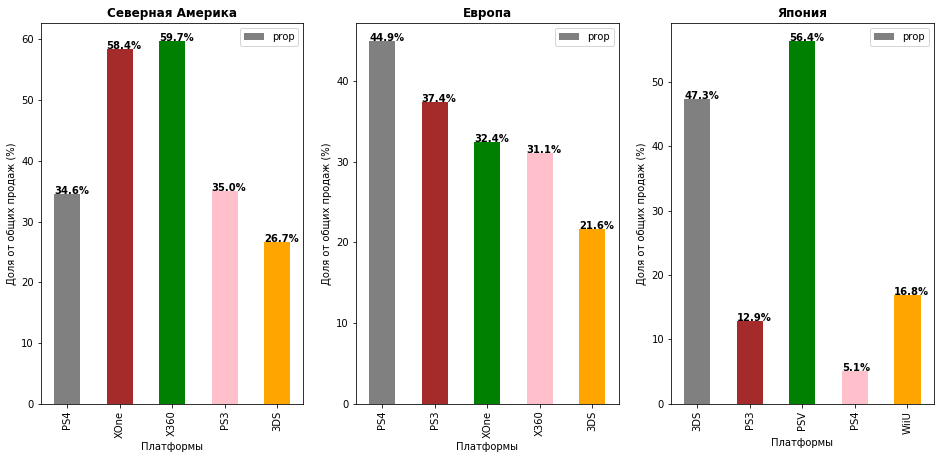

In [55]:
def proportion_platform(df, region_sales):
    regions_platf = df.pivot_table(values=[region_sales,'total_sales'] , index=['platform'], 
                                                 aggfunc={region_sales: np.sum, 'total_sales': np.sum}).sort_values(region_sales, ascending=False).head(5)
    regions_platf['prop'] = ((regions_platf[region_sales] / regions_platf['total_sales'])*100)
    
    return regions_platf
  
def plot(table, axes):
    ax = table.plot.bar(y='prop', ax=axes, color= ['grey', 'brown', 'green', 'pink', 'orange'])
    axes.set_xlabel("Платформы")
    axes.set_ylabel("Доля от общих продаж (%)")
    for rect in ax.patches:
        ax.text (rect.get_x(), rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,7))

plot(proportion_platform(df_actual,'na_sales'), axes[0])
axes[0].set_title("Северная Америка", weight='bold')

plot(proportion_platform(df_actual,'eu_sales'),axes[1])
axes[1].set_title("Европа", weight='bold')

plot(proportion_platform(df_actual,'jp_sales'),axes[2])
axes[2].set_title("Япония", weight='bold')

> * In North America and Europe, the same platforms entered the top 5: PS4, PS3, XOne, X360, 3DS. In Japan, this list only has: 3DS, PS3 and PS4. New positions not included in the top of North America and Europe - WiiU and PSV.
> * In North America, X360 and XOne are among the leaders (60% and 58% respectively), while in Japan they didn't even make the top 5, and in Europe they are at the level of ~ 32% of all sales.
> * In Europe, PS4 and its predecessor PS3 are the most popular (45% and 37% respectively). In North America, this platform occupies 35%. In Japan, only 5%.
> * In Japan, PSV (56%) and 3DS (47%) are the leading platforms, while in other regions 3DS is
one of the most unpopular, moreover, the PSV platform is not at all in the ranking of other regions.

#### The most popular genres (top 5):

Text(0.5, 1.0, 'Япония')

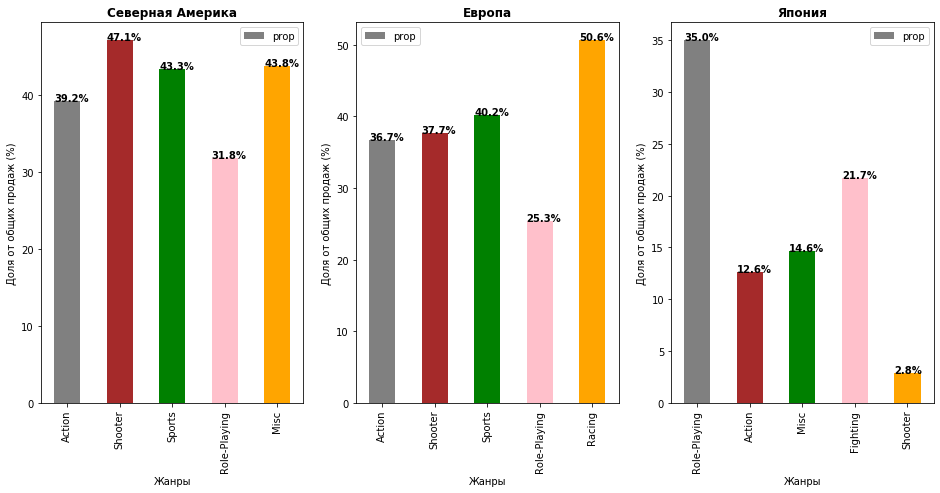

In [56]:
def proportion_genre(df, region_sales):
    regions_genre = df.pivot_table(values=[region_sales,'total_sales'] , index=['genre'], 
                                                 aggfunc={region_sales: np.sum, 'total_sales': np.sum}).sort_values(region_sales, ascending=False).head(5)
    regions_genre['prop'] = ((regions_genre[region_sales] / regions_genre['total_sales'])*100)
    
    return regions_genre
  
def plot(table, axes):
    ax = table.plot.bar(y='prop', ax=axes, color= ['grey', 'brown', 'green', 'pink', 'orange'])
    axes.set_xlabel("Жанры")
    axes.set_ylabel("Доля от общих продаж (%)")
    for rect in ax.patches:
        ax.text (rect.get_x(),rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,7))

plot(proportion_genre(df_actual,'na_sales'), axes[0])
axes[0].set_title("Северная Америка", weight='bold')

plot(proportion_genre(df_actual,'eu_sales'),axes[1])
axes[1].set_title("Европа", weight='bold')

plot(proportion_genre(df_actual,'jp_sales'),axes[2])
axes[2].set_title("Япония", weight='bold')

> * More or less the same genres are also popular in North America and Europe. In Japan, only a few genres match the leaders in other regions.
> * In North America, all the top 5 genres are more or less the same, more than 40% are occupied by Shooter, Sports Delivery Type, Misc. At the same time in Europe Shooter, Sports Delivery Type are also popular - 38% and 40% respectively. In Japan, Shooter is not popular at all - 3%, and Sports Delivery Type did not enter the top 5 at all.
> * In Europe, Racing is the most popular genre (51%), but in other regions this genre is not ranked.
> * In Japan, Role-Playing (35%) and Fighting (22%) are the leading genres. Role-Playing is also in the top 5 in other regions, but Fighting is not included in this ranking.


#### Does the ESRB rating affect sales in a particular region?

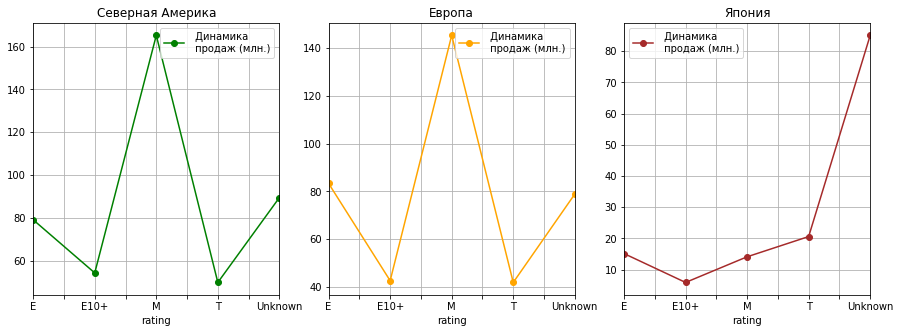

In [57]:
def rating(df, region_sales):
    rating_region = df.pivot_table(values=[region_sales,'total_sales'] , index=['rating'], 
                                                 aggfunc={region_sales: np.sum, 'total_sales': np.sum})   
    return rating_region

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
rating(df_actual,'na_sales').plot(y='na_sales', kind='line', label = ' Динамика \n продаж (млн.)', grid=True, style='o-', c='green', title='Северная Америка', ax=axes[0])

rating(df_actual,'eu_sales').plot(y='eu_sales', kind='line', label = ' Динамика \n продаж (млн.)', grid=True, style='o-', c='orange', title='Европа', ax=axes[1])
rating(df_actual,'jp_sales').plot(y='jp_sales', kind='line', label = ' Динамика \n продаж (млн.)', grid=True, style='o-', c='brown', title='Япония', ax=axes[2])

>* Rating impact in Europe and North America is almost identical - games rated "M" ("Mature") - "Mature" (17+) cover the most sales. Probably, these data speak about the target group of computer games in each region. Thus, games for teenagers and children in the mentioned regions bring little revenue to the platforms.
> * In Japan, on the contrary, the rating "T" ("Teen") - "Teenagers" (13+) increases sales. We can see in the graph that there are a lot of `Unknown` ratings in Japan. This is probably due to the fact that Japan has a Computer Entertainment Rating Organization * , with its own breakdown and names

*https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization

<a id="step4"></a>
**Conclusion**

If we describe an approximate portrait of users of computer games in different regions, then the theses are as follows:

*North America*:

Top 5 Platforms: PS4, PS3, XOne, X360, 3DS with XOne and X360 leading the way. The most popular genres are Shooter, Sports Delivery Type, Misc, all of which occupy approximately equal shares of total sales. Consumers in this region buy the most games rated "M" (17+). A key target group probably fell into this category.

*Europe*:

Consumers in this region have fairly similar results to residents of North America. It is also in the top of the platform: PS4, PS3, XOne, X360, 3DS, where PS4 and PS3 are leaders. The most popular genres are Shooter, Sports Delivery Type and Racing. The last genre is typical only for Europe. Among the inhabitants of Europe, similarly to North America, games with a rating of "M" (17+) are more popular.

*Japan*:

The preferences of the inhabitants of Japan are different from those of the two previously mentioned regions. Here new platforms appear in the top 5: PSV and 3DS, which are either not at all popular (3DS) or not at all in the ranking (PSV). Preferred genres are Role-Playing and Fighting. The latter is also not in the ranking of other regions.

###  Hypothesis testing

Since hypothesis testing is based on comparing averages, we need to remove the "markers": extra 0 and -1.

In [58]:
df_actual_no_tbd = df_actual.loc[df_actual['user_score'] != -1]

In [59]:
df_actual_filtered = df_actual_no_tbd[df_actual_no_tbd['user_score'] > 0]

We need to test several hypotheses about the equality of the means among two different platforms and two different genres. To apply the t-test, some conditions are necessary:

**1st condition**: Data within subgroups must be *normally distributed*

We apply the Shapiro-Wilk criterion for verification:

In [60]:
from scipy import stats

In [61]:
def shapiro_test(df):
    alpha = 0.05
    x,y = stats.shapiro(df['user_score'])
    print('p-значение:', y)
    if (y < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [62]:
def var_pr(df1, df2): 
    x = round(df1.var()/df2.var()*100)
    if x >= 5:
        return False
    else:
        return True

**2nd condition**: *Dispersions* of subgroups must be *homogeneous*

Let's use Levene's test for this:

In [63]:
def leven_test(df1, df2):
    alpha = 0.05
    results = stats.levene(df1['user_score'], df2['user_score'])
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

#### Hypothesis 1
*Average user ratings for Xbox One and PC platforms are the same*, where
 - H0: average platform ratings are equal
 - H1: average ratings are not equal

In [64]:
df_actual_XOne = df_actual_filtered.loc[df_actual_filtered['platform'] == 'XOne']

In [65]:
df_actual_PC = df_actual_filtered.loc[df_actual_filtered['platform'] == 'PC']

Let's check the distribution of means:
* H0 - data is normally distributed
* H1 - data is not normally distributed

In [66]:
shapiro_test(df_actual_XOne)

p-значение: 1.524856543255737e-05

Отвергаем нулевую гипотезу


In [67]:
var_pr(df_actual_XOne['user_score'], df_actual_PC['user_score'])

False

According to the criterion, the data is not normally distributed - *do not accept H0*.
We compare the averages of *ranking*. This category need not be normally distributed.

Let's test the hypothesis about the homogeneity of the samples:

* H0 - sample variances are equal
* H1 - sample variances are not equal

In [68]:
leven_test(df_actual_XOne, df_actual_PC)

p-значение: 0.003897553110130418

Отвергаем нулевую гипотезу


According to the criterion, the variances of the two samples are not equal. The conditions for performing a t-test are not met, so using this test alone will not be sufficient.
We also use the nonparametric Mann-Whitney U-test, which is less sensitive to the characteristics of our samples:

In [69]:
#T-Test

alpha_t_test = 0.05
result_t_test = stats.ttest_ind(df_actual_XOne['user_score'], df_actual_PC['user_score'], equal_var = False)

In [70]:
print('p-значение:', result_t_test.pvalue)

if result_t_test.pvalue < alpha_t_test :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463

Не получилось отвергнуть нулевую гипотезу


In [71]:
#U-Test
alpha_u_test = 0.05
result_u_test = stats.mannwhitneyu(df_actual_XOne['user_score'], df_actual_PC['user_score'])

In [72]:
print('p-значение:', result_u_test.pvalue)

if result_u_test.pvalue < alpha_u_test :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2505503367311187

Не получилось отвергнуть нулевую гипотезу


In [73]:
print('Медианное значение пользовательского рейтинга платформы XOne:', df_actual_XOne['user_score'].median())
print('Медианное значение пользовательского рейтинга платформы PC:', df_actual_PC['user_score'].median())

Медианное значение пользовательского рейтинга платформы XOne: 6.8

Медианное значение пользовательского рейтинга платформы PC: 6.8


**We don't have enough reason to reject the H0 hypothesis that the user ratings of the two platforms are equal.**

#### Hypothesis 2
*Average user ratings for the Action and Sports genres are different*:
 - H0: average ratings are equal
 - H1: average ratings are not equal

In [74]:
df_actual_Action = df_actual_filtered.loc[df_actual_filtered['genre'] == 'Action']

In [75]:
df_actual_Sports = df_actual_filtered.loc[df_actual_filtered['genre'] == 'Sports']

We apply the Shapiro-Wilk criterion:
    
* H0 - data is normally distributed
* H1 - data is not normally distributed

In [76]:
shapiro_test(df_actual_Action)

p-значение: 1.0798927229597587e-14

Отвергаем нулевую гипотезу


In [77]:
var_pr(df_actual_Action['user_score'], df_actual_Sports['user_score'])

False

We apply the Levin criterion:
    
* H0 - sample variances are equal
* H1 - sample variances are not equal

In [78]:
leven_test(df_actual_Action, df_actual_Sports)

p-значение: 4.2566688218274047e-07

Отвергаем нулевую гипотезу


Similarly, we apply the t-test together with the non-parametric Mann-Whitney U-test:

In [79]:
#T-Test

alpha_t_test2 = 0.05
result_t_test2 = stats.ttest_ind(df_actual_Action['user_score'], df_actual_Sports['user_score'], equal_var = False)

In [80]:
print('p-значение:', result_t_test2.pvalue)

if result_t_test2.pvalue < alpha_t_test2 :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20

Отвергаем нулевую гипотезу


In [81]:
#U-Test

alpha_u_test2 = 0.05
result_u_test2 = stats.mannwhitneyu(df_actual_Action['user_score'], df_actual_Sports['user_score'])

In [82]:
print('p-значение:', result_u_test2.pvalue)

if result_u_test2.pvalue < alpha_u_test2 :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.594585292409964e-24

Отвергаем нулевую гипотезу


In [83]:
print('Медианное значение пользовательского рейтинга жанра Action:', df_actual_Action['user_score'].median())
print('Медианное значение пользовательского рейтинга жанра Sports:', df_actual_Sports['user_score'].median())

Медианное значение пользовательского рейтинга жанра Action: 7.1

Медианное значение пользовательского рейтинга жанра Sports: 5.5


**We also do not have enough reason to reject the H0 hypothesis about the equality of the user ratings of the two genres.**

<a id="step5"></a>
**Conclusion**

We tested several hypotheses:

1. The average user ratings of the Xbox One and PC platforms are the same;
2. The average user ratings of the genres Action and Sports are different.

<div class="alert-alert-info">

In the first case, we could not reject H0 about the equality of the average XOne and PC platforms. However, the averages for Action and Sports games turned out to be different - we reject the H0 hypothesis.

###  Общий вывод

We analyzed the data for the period from 2013 to 2016. This period was not chosen by chance: in the graph of platforms with games released on them and total profit, we noticed that in general, by 2013, many platforms stopped releasing games. In addition, two other platforms emerged in 2013 that sold more copies. We also set the approximate time of the "existence" of the platform - from the release of the first game to the release of the last - up to 5 years.
Having set the current period, we identified the top 5 platforms that not only sold the most games over the entire period, but also proved to be more or less stable in terms of sales: 'PS4', '3DS', 'XOne', 'WiiU', 'PC '.
We found that critic scores are associated with sales growth for both the top selling platform, PS4, and the rest of the top 5 platforms. As for user ratings, they do not affect sales on PS4 and other platforms at all. We also found that the most popular genres are not necessarily the best selling ones.
We have compiled an approximate portrait of the consumer depending on the region, based on the most popular categories in terms of sales:

*North America*:
- platforms: X360 and XOne;
- Genres: Shooter, Misc, Sports
- rating: "M" ("Mature") - "For adults" (17+)

*Europe*:
- platforms: PS4 and PS3;
- Genres: Racing and Sports
- rating: "M" ("Mature") - "For adults" (17+)

*Japan*:
- platforms: PS4 and PS3;
- genres: Role-Playing and Fighting
- rating: "T" ("Teen") - "Teenagers" (13+)

*However, if we talk about potentially profitable platforms and genres for all regions, then we can highlight the following*:
- platforms: PS4/PS3 and 3DS;
- genres: Action and Role-Playing.

<div class="alert-alert-info">
    
Finally, we tested several hypotheses to understand how user ratings might differ. To do this, we took several platforms and genres with different volumes of copies sold. As a result, the average scores of users of the PC and XOne platforms were equal. In terms of genres, the difference between the averages of Action and Sports games turned out to be statistically significant.
Thus, probably, in order to develop a future marketing strategy, a potential customer should pay attention to platforms with a high critical rating, regional features, as well as games with different genres. In our case, Action games have a high rating.